In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [13]:
x = np.linspace(0,10,1000)
length_of_pulse = 10

In [14]:
def input_shape(x:float) -> float:
    return np.exp(-(x-length_of_pulse/2)**2/(length_of_pulse/5)**2)

In [15]:
y = input_shape(x)

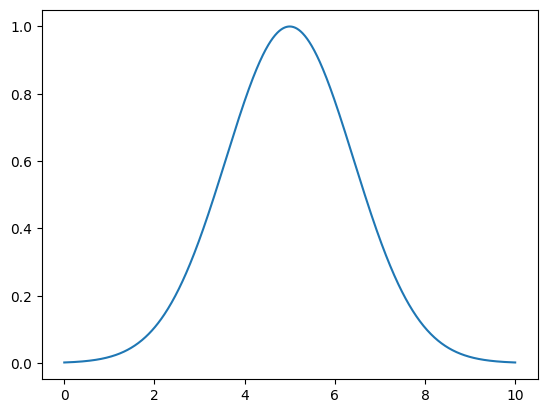

In [16]:
plt.plot(x,y)